In [1]:
from scipy.stats import poisson
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1

Сортируем по возрастанию, минимальное и максимальное значение соответственно а и b

# 2 

In [2]:
n = 17
rv = poisson(n)

In [3]:
df = pd.DataFrame({}, columns=['mean error', 'var error'])
for i in range(15):
    sample = rv.rvs(size=100)
    df = df.append({'mean error': abs(sample.mean() - n),
                    'var error':abs(sample.std()**2 - n)},
                   ignore_index=True)

In [4]:
df

,mean error,var error
0,0.13,0.1669
1,0.60,0.9000
2,0.60,0.8200
3,0.21,3.6541
4,0.06,3.4436
5,0.60,2.3800
6,0.17,0.9189
7,0.57,0.9651
8,0.15,1.6525
9,0.34,1.3956


In [5]:
for i, j in df.T.iterrows():
    print(i, '=', j.mean())

mean error = 0.294666666666667
var error = 1.932079999999998


!wget https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar11/breast_cancer_1000_genes.tsv
!wget https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar11/breast_cancer_key_genes.tsv

In [6]:
df1000 = pd.read_csv('breast_cancer_1000_genes.tsv', sep='\t', index_col=0)
df_key = pd.read_csv('breast_cancer_key_genes.tsv', sep='\t', index_col=0)

# 3 

$\theta$ = mean(Xn)/n (по определению $\theta$ Bin(m, $\theta$) $\theta$ = E(X)/n)

m = max(Xn) (Самый простой вариант)


# 4 

ValueError: top20 is not a valid palette name

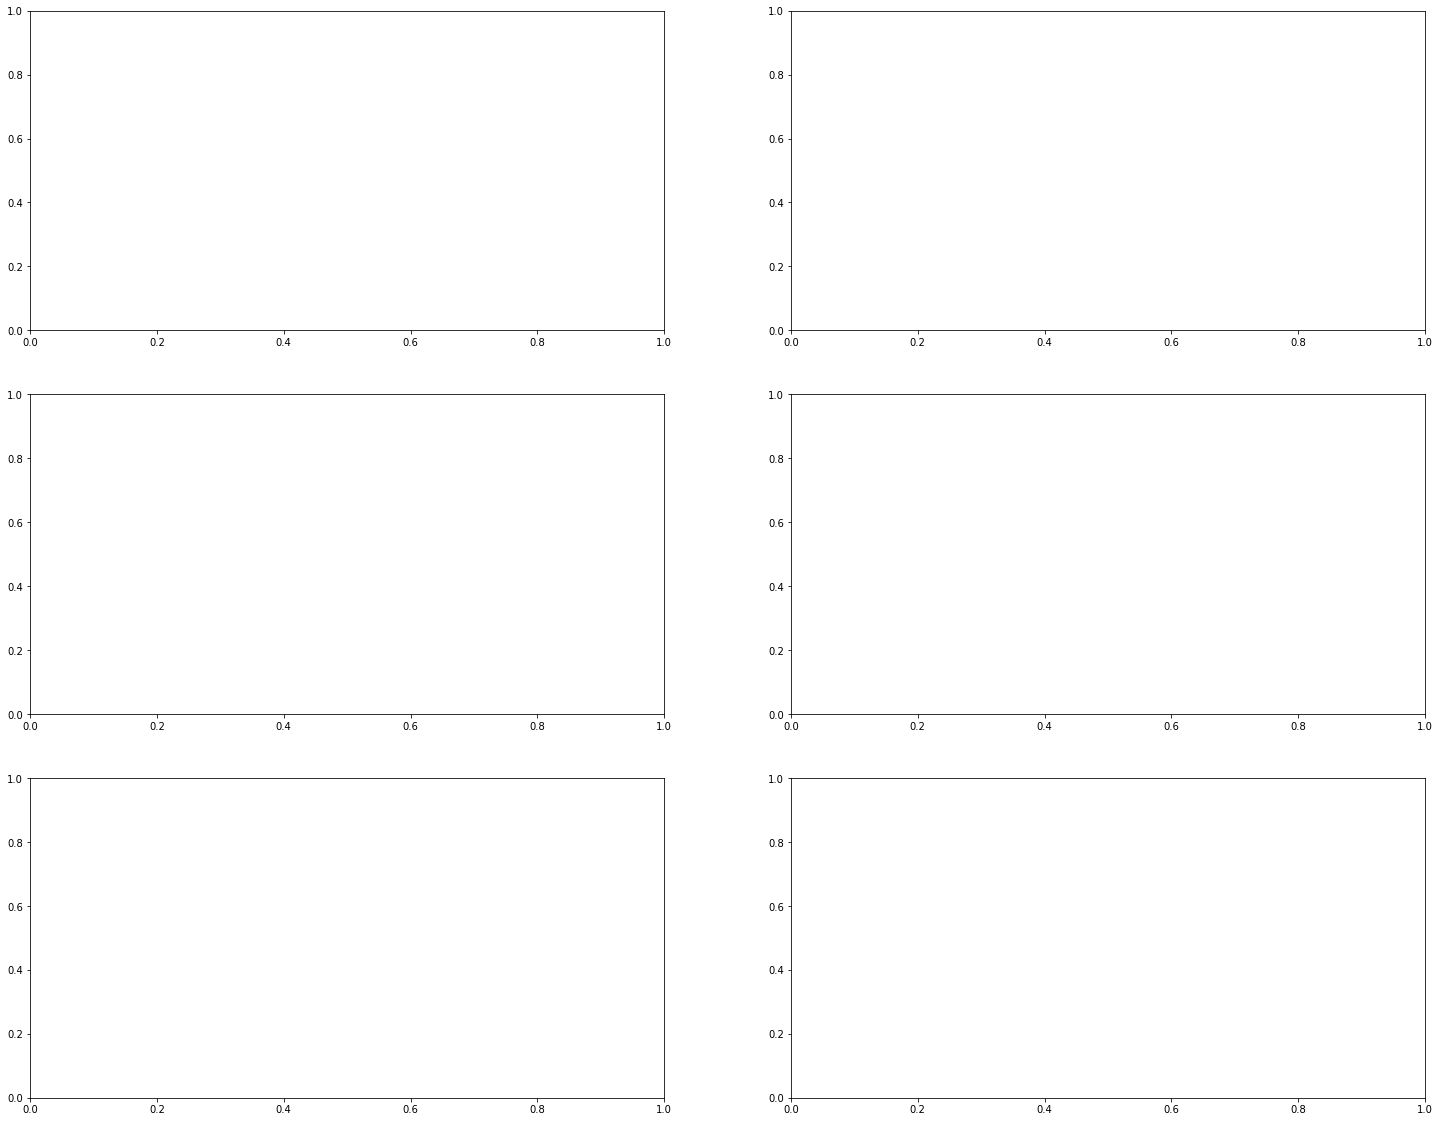

In [20]:
df = pd.DataFrame()
df['Difference between maximum and minimum'] = df1000.max(axis=1) - df1000.min(axis=1)
df['Variance'] = df1000.std(axis=1)**2
df['Interquartile range'] = df1000.quantile(.75, axis=1) - df1000.quantile(.25, axis=1) 

lsize = 14
tsize = 18
palette = 'top20'
fig, ax = plt.subplots(3, 2, figsize=(25, 20))
axes = [(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1)]
tops = {}

for i, j in zip(df.columns, axes):
    tmp = df.sort_values(i).iloc[:10].index
    for k in tmp:
        tops[k] = tops.get(k, 0) + 1
    sns.boxplot(data=df1000.loc[tmp].T, ax=ax[j], palette=palette)
    
    ax[j].set_title(i, size=tsize)
    ax[j].set_xlabel('Genes', size=lsize)
    ax[j].set_ylabel('Expression', size=lsize)

tops_labels = sorted(tops, key=lambda x: tops[x], reverse=True)
tops_values = [tops[i] for i in tops_labels]

sns.barplot(x=tops_labels, y=tops_values, ax=ax[axes[-3]], alpha=.8, palette=palette)
ax[axes[-3]].set_title('The number of occurrences of genes in different sample metrics', size=tsize)
ax[axes[-3]].set_yticks([i for i in range(1, 4)])
ax[axes[-3]].set_xlabel('Genes', size=lsize)
ax[axes[-3]].set_ylabel('Number of occurances', size=lsize)

tmp = df1000.loc[tops_labels[0:5]]
sns.kdeplot(data=tmp.T, ax=ax[axes[-2]], fill=True, common_norm=True, palette=palette)
ax[axes[-2]].set_title('Kernel density estimation plot of most "stable" genes', size=tsize)
ax[axes[-2]].set_xlabel('Expression', size=lsize)
ax[axes[-2]].set_ylabel(' Normalized density', size=lsize)

tmp = tmp.T.melt(var_name='Gene', value_name='Expression')
sns.histplot(data=tmp, x='Expression', hue='Gene',
             binrange=(tmp.Expression.min(), tmp.Expression.max()), bins=20,
             stat='density', palette=palette, ax=ax[axes[-1]])
ax[axes[-1]].set_title('Expression histogram of most "stable" genes', size=tsize)
ax[axes[-1]].set_xlabel(ax[axes[-1]].get_xlabel(), size=lsize)
ax[axes[-1]].set_ylabel(ax[axes[-1]].get_ylabel(), size=lsize)

plt.tight_layout()
plt.savefig('boxplots_1000')

# 5 

In [8]:
df_key.head()

,ESR1,PGR,ERBB2,MKI67
TCGA-3C-AAAU-01A,3.691075,2.975339,5.043666,3.314383
TCGA-3C-AALI-01A,0.336400,0.110920,9.717665,3.107031
TCGA-3C-AALJ-01A,4.688752,1.291904,5.630728,2.085183
TCGA-3C-AALK-01A,3.221422,2.930038,7.311545,2.298665
TCGA-4H-AAAK-01A,4.355086,3.867628,5.844283,2.416418


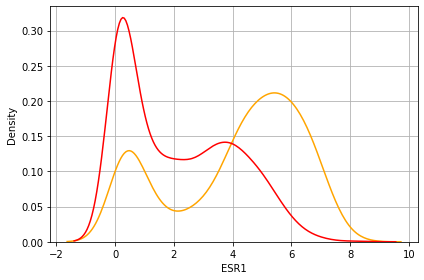

In [9]:
sns.kdeplot(x=df_key["ESR1"], color='orange')
sns.kdeplot(x=df_key["PGR"], color='red')
plt.grid()
plt.tight_layout()

<AxesSubplot:xlabel='PGR', ylabel='Density'>

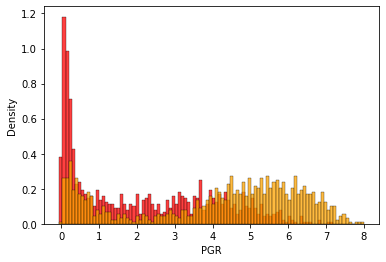

In [10]:
sns.histplot(data=df_key['PGR'], binrange=(-0.05, 8), bins=100, stat='density', color='red')
sns.histplot(data=df_key['ESR1'], binrange=(-0.05, 8), bins=100, stat='density', color='orange')